<a href="https://colab.research.google.com/github/AnurupKrishna/DataAnalyticsProjectNotebooks/blob/main/Econ_FRED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
plt.style.use('fivethirtyeight')

In [ ]:
!pip install fredapi > /dev/null

In [ ]:
from fredapi import Fred

In [ ]:
color_pal=plt.rcParams["axes.prop_cycle"].by_key()['color']

In [ ]:
fred_key='8547f87ee95e965b46ead1c59fa087e6'

Fred Object

In [ ]:
fred=Fred(api_key=fred_key)

Search fred for economic data

In [ ]:
sp_search=fred.search('S&P',order_by="popularity")

In [ ]:
#sp_search

Search limited to 1000

In [ ]:
sp500=fred.get_series('SP500')

<Axes: title={'center': 'S&P500'}>

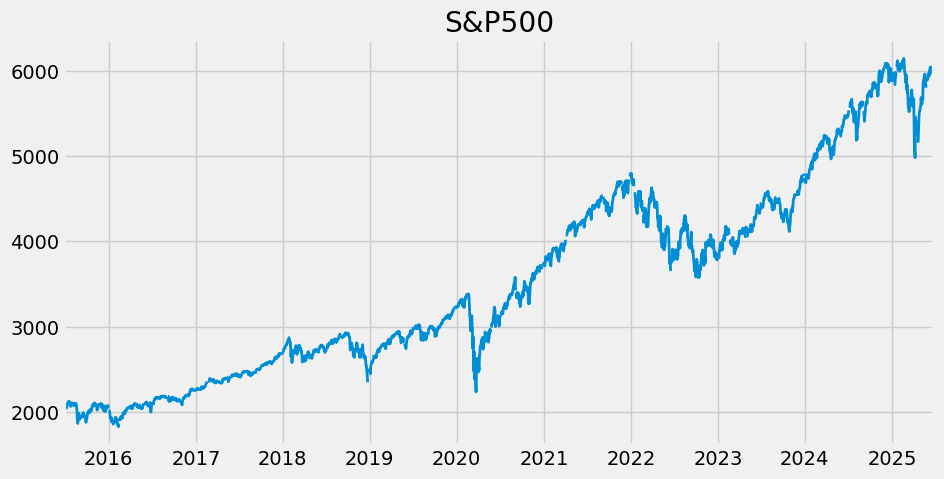

In [ ]:
sp500.plot(figsize=(10,5),title='S&P500',lw=2)

In [ ]:
unemp_results=fred.search('unemployment')

In [ ]:
#unemp_results

In [ ]:
unrate=fred.get_series('UNRATE')

<Axes: >

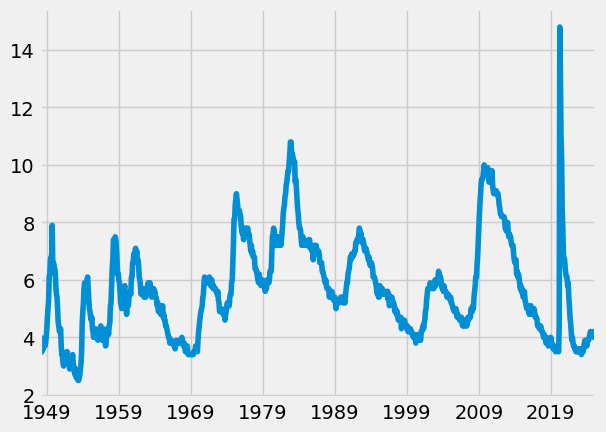

In [ ]:
unrate.plot()

In [ ]:
unemp_df=fred.search('unemployment state',filter=('frequency','Monthly'))
#unemp_df.head()

In [ ]:
unemp_df=unemp_df.query('seasonal_adjustment=="Seasonally Adjusted" and units=="Percent"')

In [ ]:
#unemp_df

In [ ]:
unemp_df=unemp_df[unemp_df['title'].str.contains('Unemployment Rate')]

In [ ]:
import time

In [ ]:
unemp_df.index

Index(['UNRATE', 'LNS14000006', 'CAUR', 'M0892AUSM156SNBR', 'TXUR',
       'LNS14000024', 'M0892BUSM156SNBR', 'LNS14000031', 'NYUR', 'U2RATE',
       'FLUR', 'LNS14000002', 'LNS14000009', 'LNS14000003', 'PAUR', 'OHUR',
       'LNS14000001', 'MIUR', 'LNS14027660', 'ALUR', 'LNS14027662', 'MAUR',
       'LNS14024887', 'ILUR', 'NCUR', 'NJUR', 'GAUR', 'COUR', 'AZUR', 'WIUR',
       'VAUR', 'KYUR', 'MNUR', 'SCUR', 'NMUR', 'LRUN64TTUSM156S', 'TNUR',
       'LNS14032183', 'WAUR', 'MDUR', 'ORUR', 'LNS14000012', 'LNS14027659',
       'WVUR', 'NVUR', 'ARUR'],
      dtype='object', name='series id')

In [ ]:
unemp_df=unemp_df[unemp_df.index.str.len()<=6]

In [ ]:
unemp_df.index

Index(['UNRATE', 'CAUR', 'TXUR', 'NYUR', 'U2RATE', 'FLUR', 'PAUR', 'OHUR',
       'MIUR', 'ALUR', 'MAUR', 'ILUR', 'NCUR', 'NJUR', 'GAUR', 'COUR', 'AZUR',
       'WIUR', 'VAUR', 'KYUR', 'MNUR', 'SCUR', 'NMUR', 'TNUR', 'WAUR', 'MDUR',
       'ORUR', 'WVUR', 'NVUR', 'ARUR'],
      dtype='object', name='series id')

In [ ]:
all_res=[]
for id in unemp_df.index:
  time.sleep(2)
  results=fred.get_series(id)
  results=results.to_frame(name=id)
  all_res.append(results)


In [ ]:
type(all_res)

list

In [ ]:
unrate_df=pd.concat(all_res,axis=1)

In [ ]:
#unrate_df.isna().sum()

<Axes: >

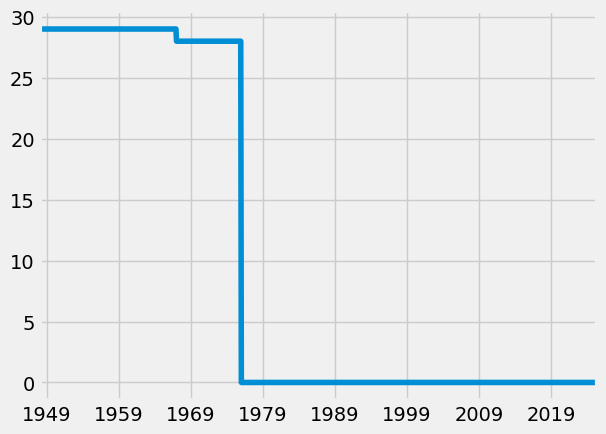

In [ ]:
unemp_states=unrate_df.drop('UNRATE',axis=1)
unemp_states.isna().sum(axis=1).plot()

In [ ]:
#unemp_states

In [ ]:
unemp_states=unemp_states.dropna(axis=0)

In [ ]:
#unemp_states

In [ ]:
px.line(unemp_states)

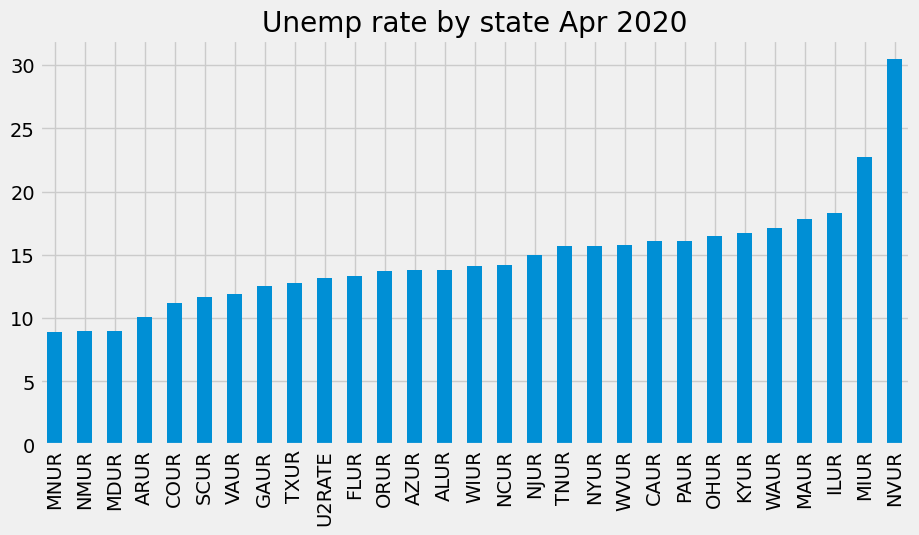

In [ ]:
#Apr 2020 Unemp rate
ax=unemp_states[unemp_states.index=='2020-04-01'].T.sort_values('2020-04-01').plot(kind='bar',figsize=(10,5),title='Unemp rate by state Apr 2020')
ax.legend().remove()
plt.show()

In [ ]:
id_to_state=unemp_df['title'].str.replace('Unemployment Rate in','').to_dict()

In [ ]:
unemp_states.columns=[id_to_state[c] for c in unemp_states.columns]

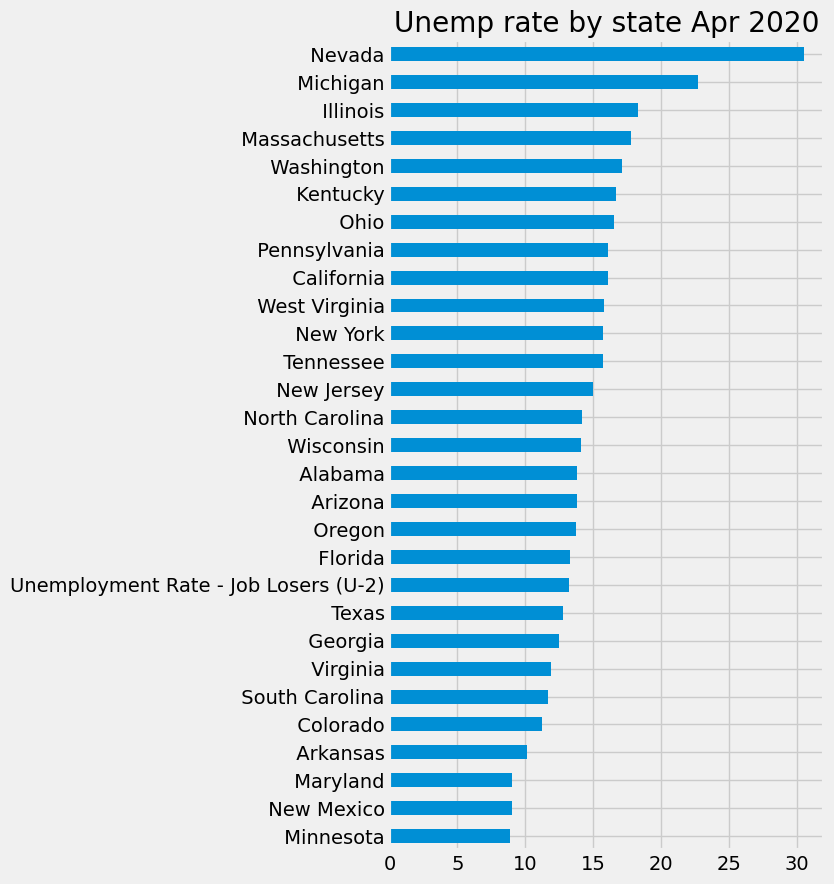

In [ ]:
ax=unemp_states[unemp_states.index=='2020-04-01'].T.sort_values('2020-04-01').plot(kind='barh',figsize=(5,10),title='Unemp rate by state Apr 2020')
ax.legend().remove()
plt.show()

In [ ]:
part_df=fred.search('participation rate state',filter=('frequency','Monthly'))
part_df=part_df.query('seasonal_adjustment=="Seasonally Adjusted" and units=="Percent"')

In [ ]:
part_df.shape

(113, 15)

In [ ]:
part_id_to_state=part_df['title'].str.replace('Labor Force Participation Rate for ','').to_dict()

In [ ]:
all_res=[]
for id in part_df.index:
  time.sleep(2)
  results=fred.get_series(id)
  results=results.to_frame(name=id)
  all_res.append(results)

In [ ]:
part_states=pd.concat(all_res,axis=1)

In [ ]:
part_states=part_states.T[part_states.columns.str.len()<=10].T

In [ ]:
part_states.columns=[part_id_to_state[c] for c in part_states.columns]

In [ ]:
#part_states.columns

Text(0.5, 1.0, 'New York')

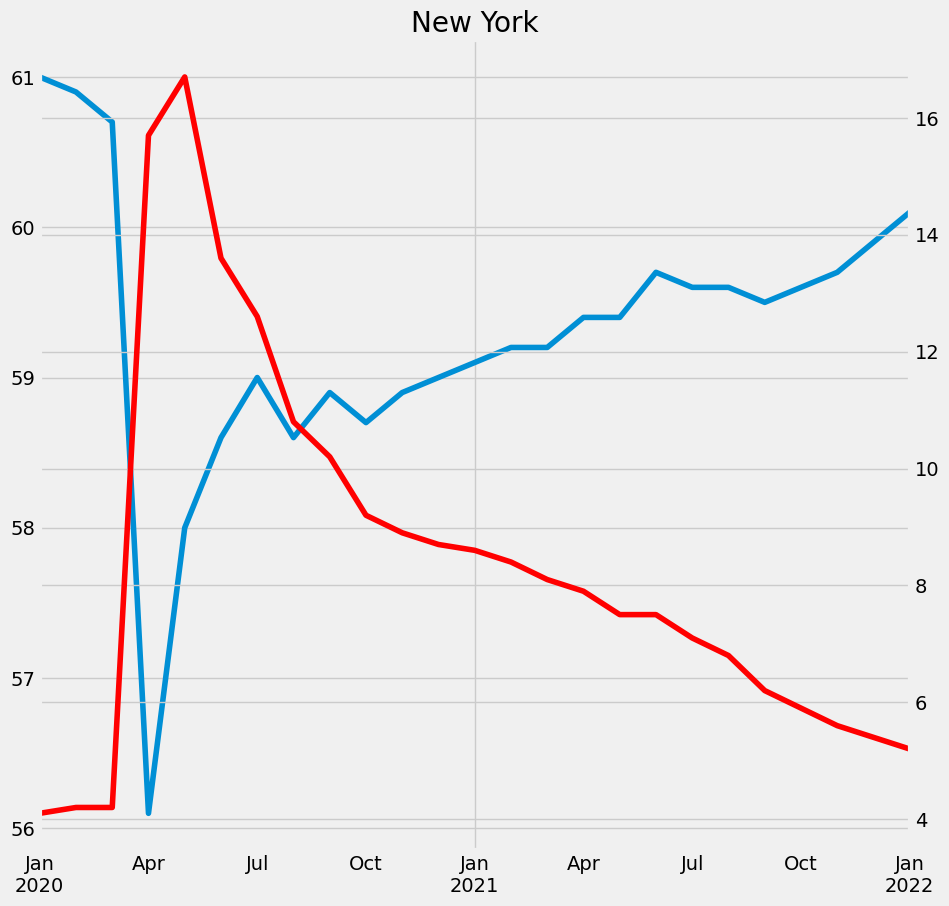

In [ ]:
fig,ax=plt.subplots(figsize=(10,10))
ax2=ax.twinx()
part_states.query('index>=2020 and index<=2022')['New York'].plot(label='Participation',ax=ax)
unemp_states.query('index>=2020 and index<=2022')[' New York'].plot(label='Unemployment',ax=ax2,color='red')
ax.set_title('New York')

In [ ]:
part_states.columns

Index(['Labor Force Participation Rate', 'California', 'Alabama', 'New York',
       'Michigan', 'Mississippi', 'Texas', 'Florida', 'Kentucky', 'Ohio',
       'Wisconsin', 'Pennsylvania', 'Massachusetts', 'Minnesota', 'Maryland',
       'West Virginia', 'Tennessee', 'Maine', 'Illinois', 'North Carolina',
       'Georgia', 'Louisiana', 'South Carolina', 'Colorado', 'Utah',
       'Virginia', 'Indiana', 'Missouri', 'New Jersey', 'Iowa', 'Alaska',
       'Washington', 'Arizona', 'New Mexico', 'Idaho', 'Arkansas', 'Oklahoma',
       'Nebraska', 'Hawaii', 'Nevada', 'Montana', 'Oregon', 'New Hampshire',
       'Vermont', 'Connecticut', 'North Dakota', 'South Dakota', 'Kansas',
       'Rhode Island', 'District Of Columbia', 'Delaware', 'Wyoming',
       'Monthly Share of All U.S. Workers Who Leave the Labor Force After a Quit',
       'Monthly Share of All U.S. Workers Who Leave the Labor Force After a Layoff',
       'Monthly Share of Prime-Age U.S. Workers Who Leave the Labor Force After a 

In [ ]:
unemp_states.columns=unemp_states.columns.str[1:]

In [ ]:
unemp_states.columns

Index(['California', 'Texas', 'New York',
       'nemployment Rate - Job Losers (U-2)', 'Florida', 'Pennsylvania',
       'Ohio', 'Michigan', 'Alabama', 'Massachusetts', 'Illinois',
       'North Carolina', 'New Jersey', 'Georgia', 'Colorado', 'Arizona',
       'Wisconsin', 'Virginia', 'Kentucky', 'Minnesota', 'South Carolina',
       'New Mexico', 'Tennessee', 'Washington', 'Maryland', 'Oregon',
       'West Virginia', 'Nevada', 'Arkansas'],
      dtype='object')

In [ ]:
cols=set(unemp_states.columns).intersection(set(part_states.columns))

In [ ]:
cols=list(cols)
len(cols)

28

In [ ]:
part_states=part_states[cols]
unemp_states=unemp_states[cols]

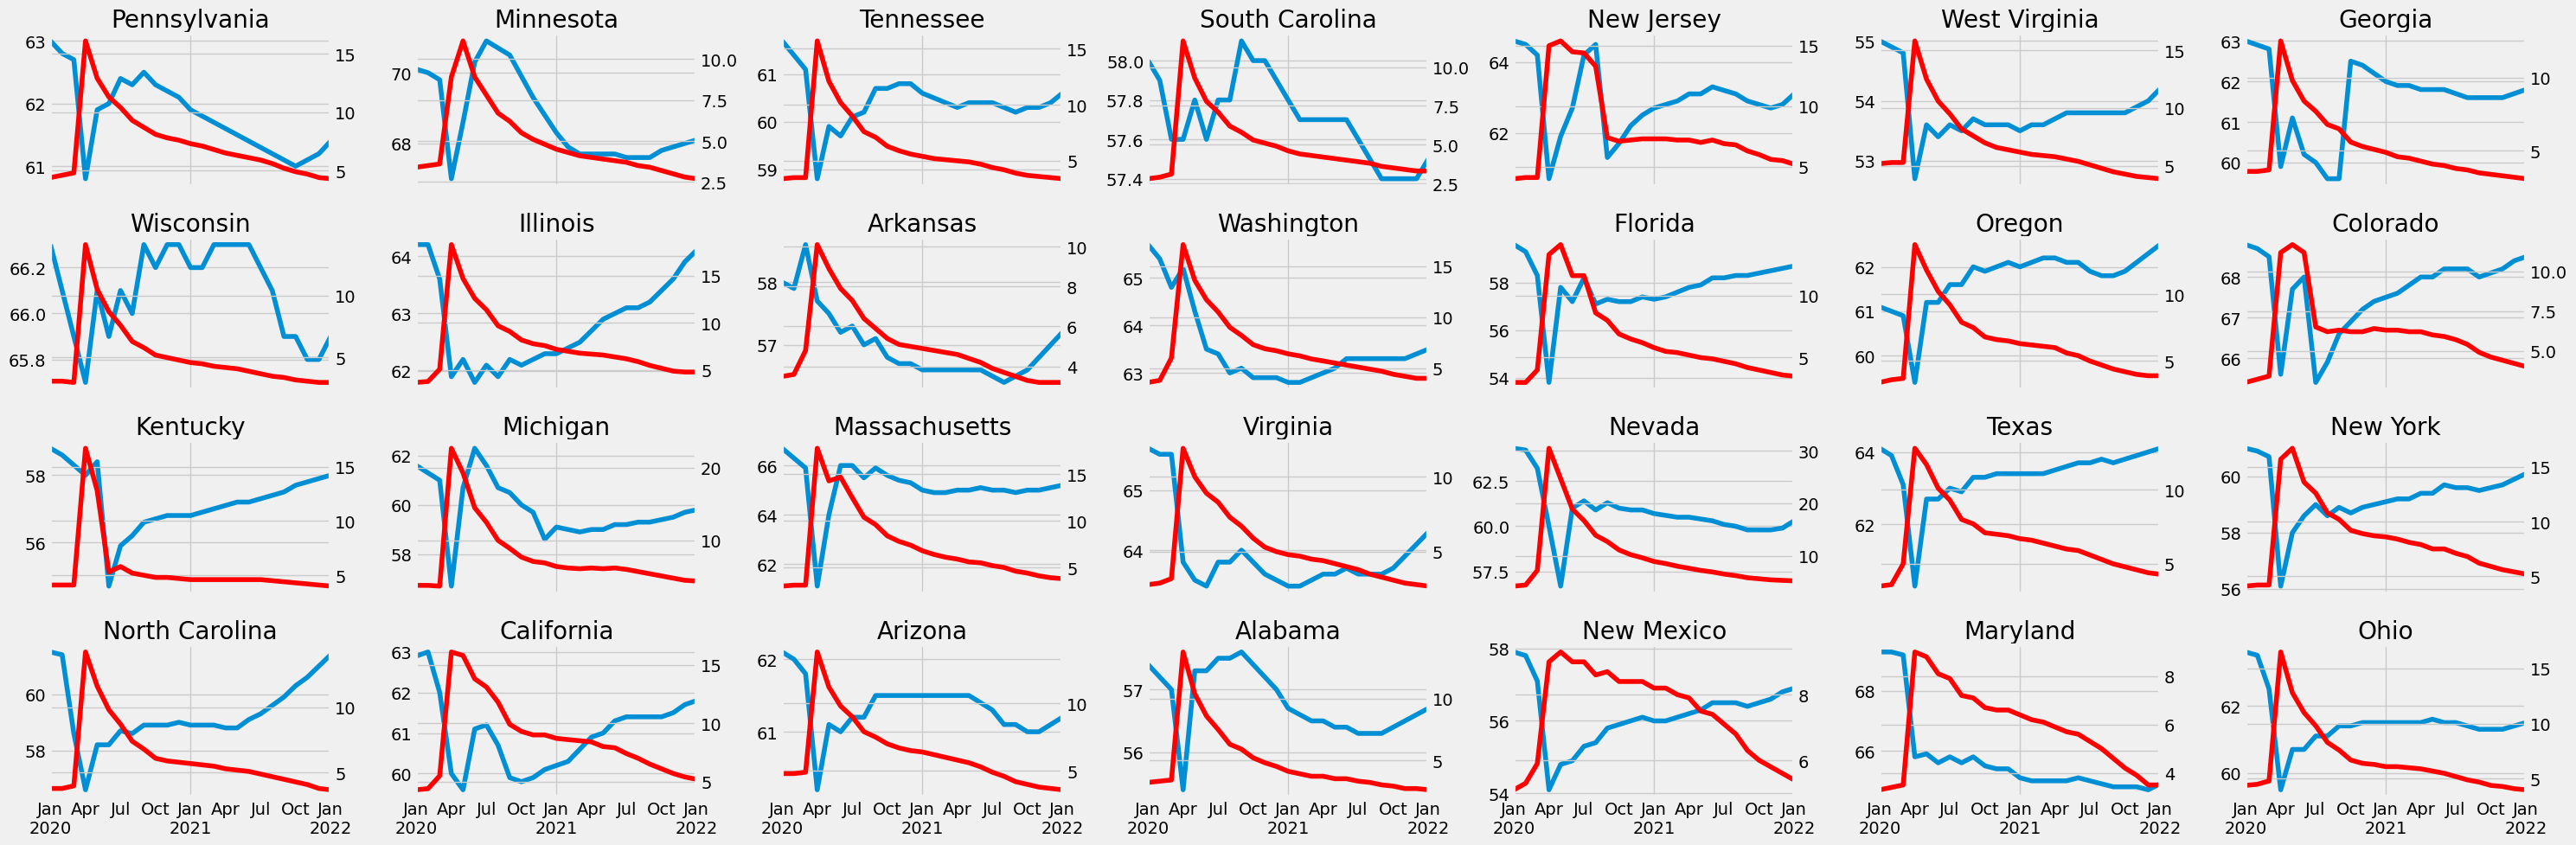

In [ ]:
fig,axs=plt.subplots(4,7,figsize=(30,10),sharex=True)
axs=axs.flatten()
i=0
for state in unemp_states.columns:
  ax2=axs[i].twinx()
  part_states.query('index>=2020 and index<=2022')[state].plot(label='Participation',ax=axs[i])
  unemp_states.query('index>=2020 and index<=2022')[state].plot(label='Unemployment',ax=ax2,color='red')
  axs[i].set_title(state)
  i+=1
plt.tight_layout()
plt.show()